In [137]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [138]:
# Load the dataset
# put your own dataset file path (.csv)
df = pd.read_csv(r'\Users\Huawei\Downloads\Customer Data (Modified).csv')

In [139]:
# Display the head and tail of the dataset
df.head()
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.49,1.00,291.12,0.00,291.12,0.00,1.00,0.00,0.83,0.00,0,6,1000.0,325.59,48.89,0.50,6
8946,C19187,19.18,1.00,300.00,0.00,300.00,0.00,1.00,0.00,0.83,0.00,0,6,1000.0,275.86,NaN,0.00,6
8947,C19188,23.40,0.83,144.40,0.00,144.40,0.00,0.83,0.00,0.67,0.00,0,5,1000.0,81.27,82.42,0.25,6
8948,C19189,13.46,0.83,0.00,0.00,0.00,36.56,0.00,0.00,0.00,0.17,2,0,500.0,52.55,55.76,0.25,6
8949,C19190,372.71,0.67,1093.25,1093.25,0.00,127.04,0.67,0.67,0.00,0.33,2,23,1200.0,63.17,88.29,0.00,6


In [140]:
# Start the Exploratory Data Analysis (EDA)
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [141]:
# Fill missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [142]:
# Recheck missing values in the dataset
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [143]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [144]:
# Drop CUST_ID column because it is not used in this segmentation project
df.drop(columns=["CUST_ID"], axis=1, inplace=True)

In [145]:
# Recheck the head of the dataset
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.510000,0.00,12
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.340000,0.22,12
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.280000,0.00,12
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,864.206571,0.00,12
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.790000,0.00,12


In [146]:
# Read all columns name
print(df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


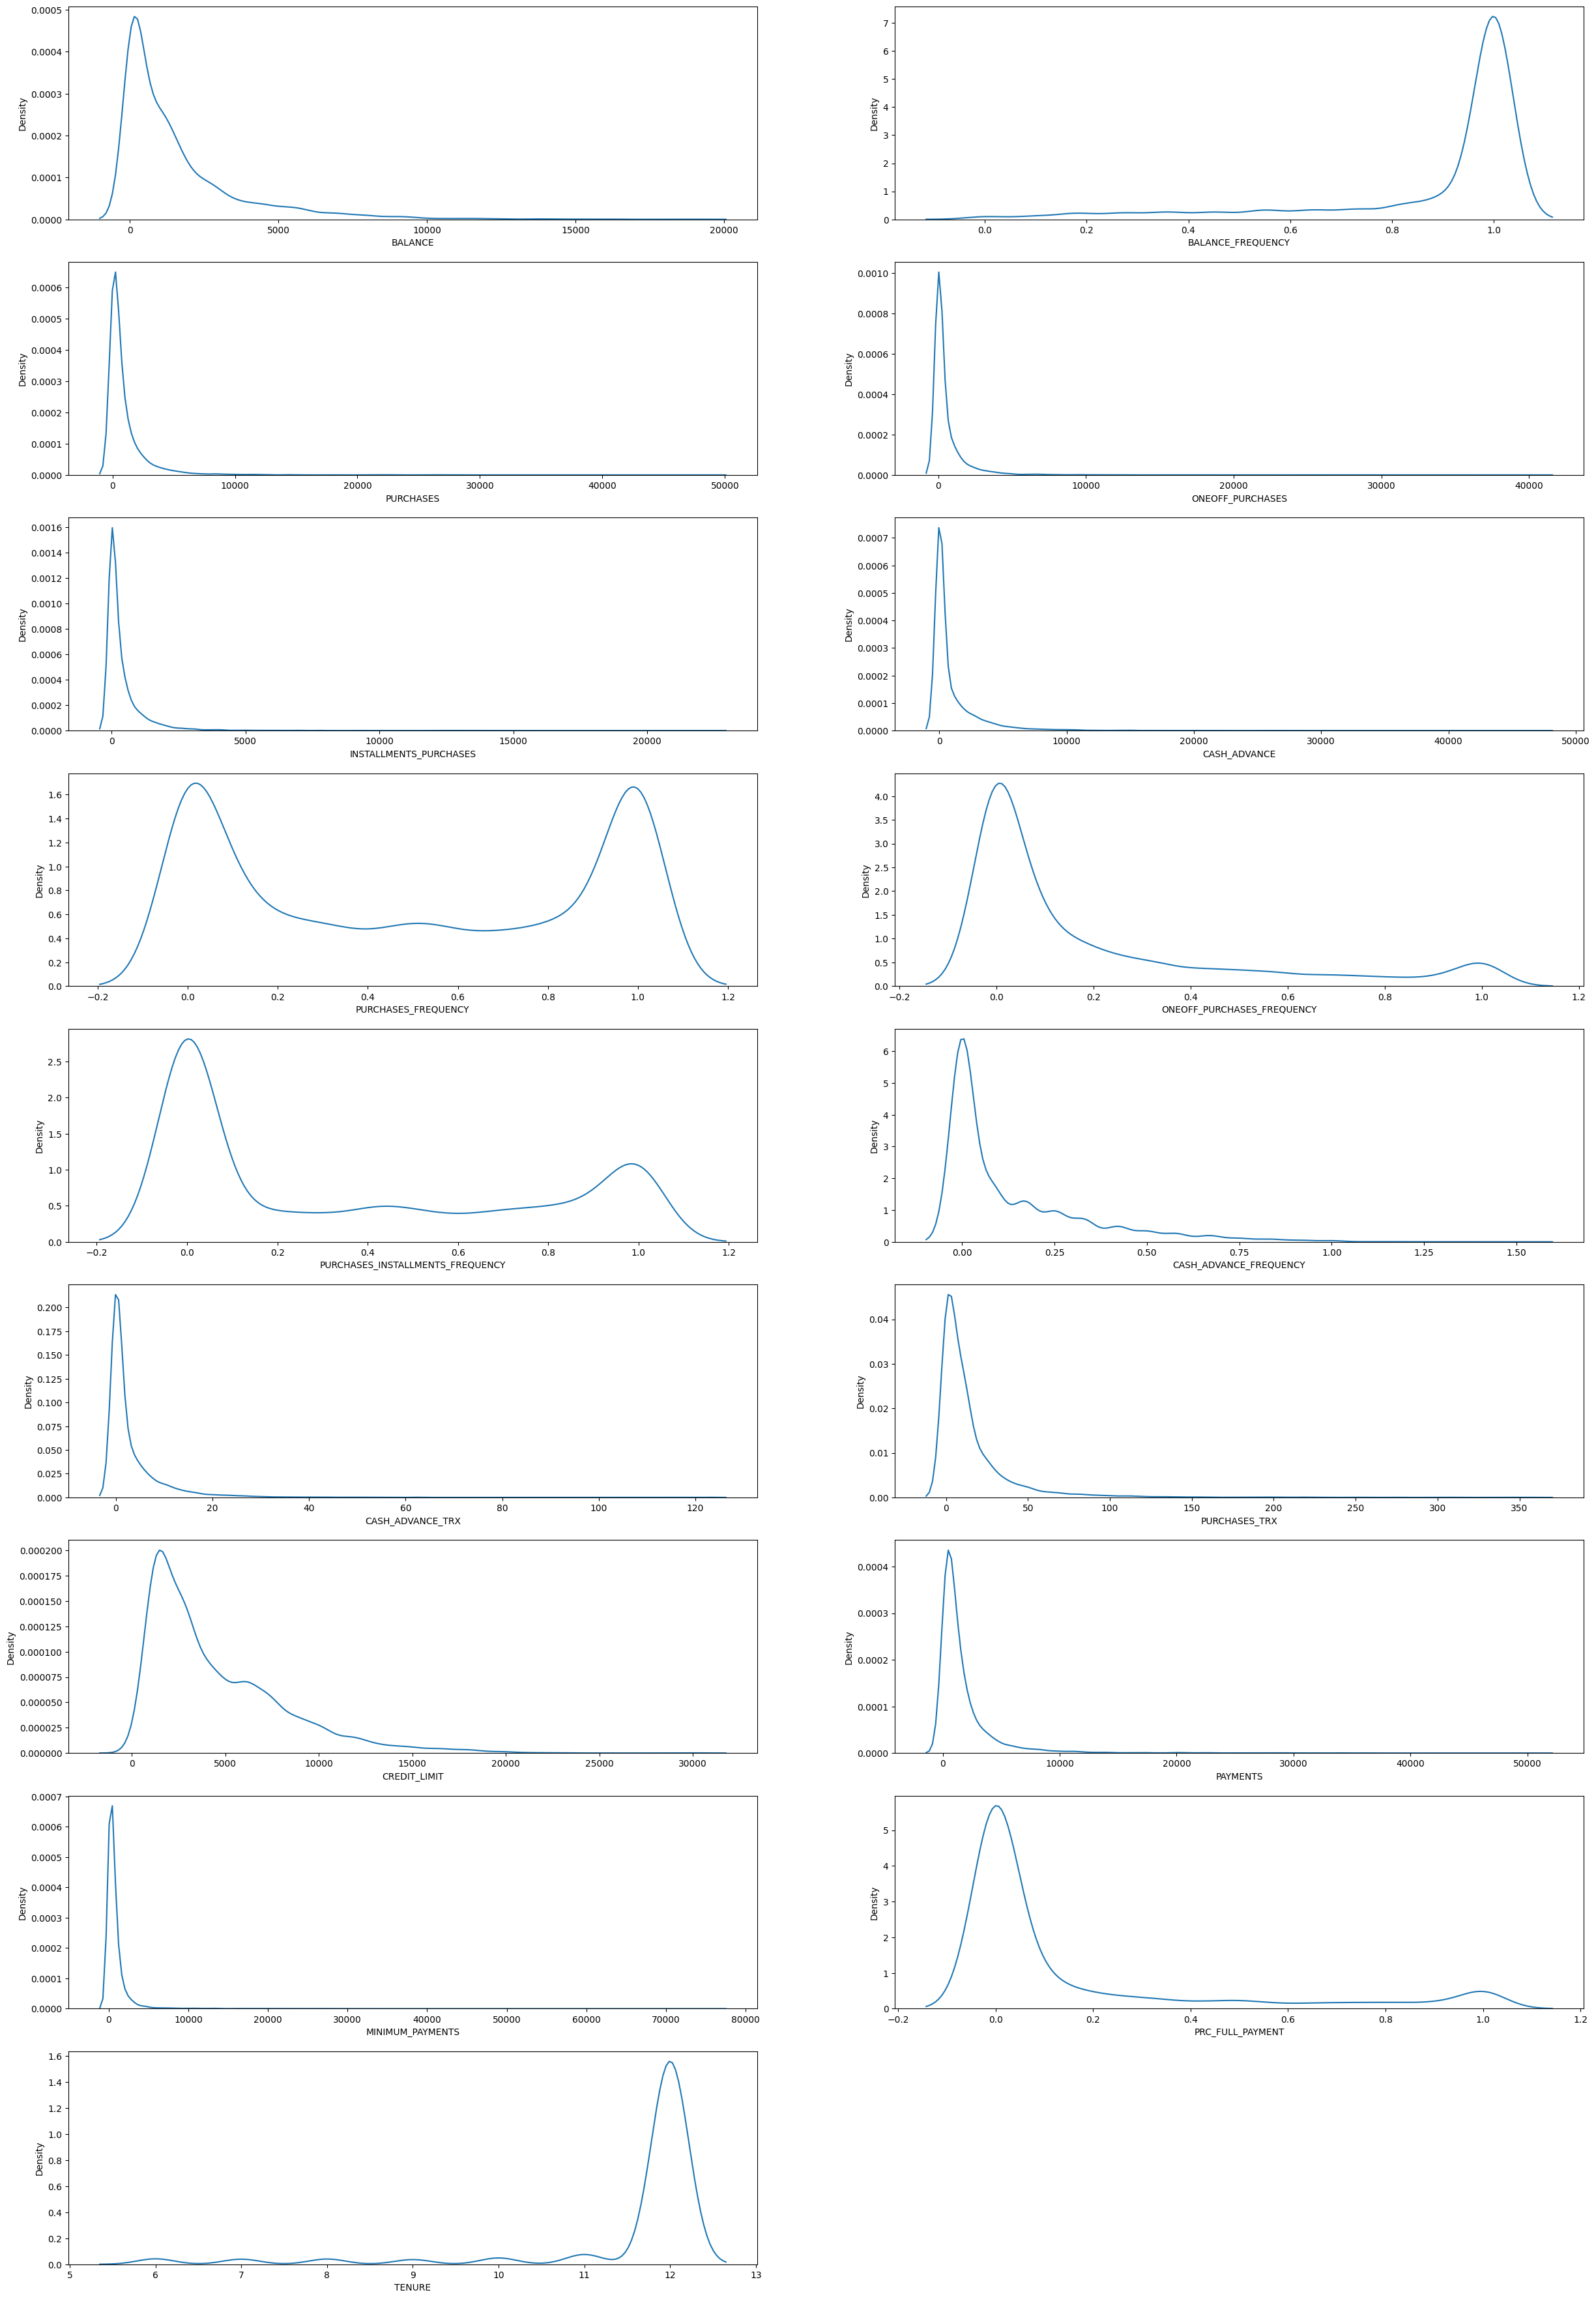

In [147]:
# Visualization of the data distribution
plt.figure(figsize=(30, 45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i + 1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

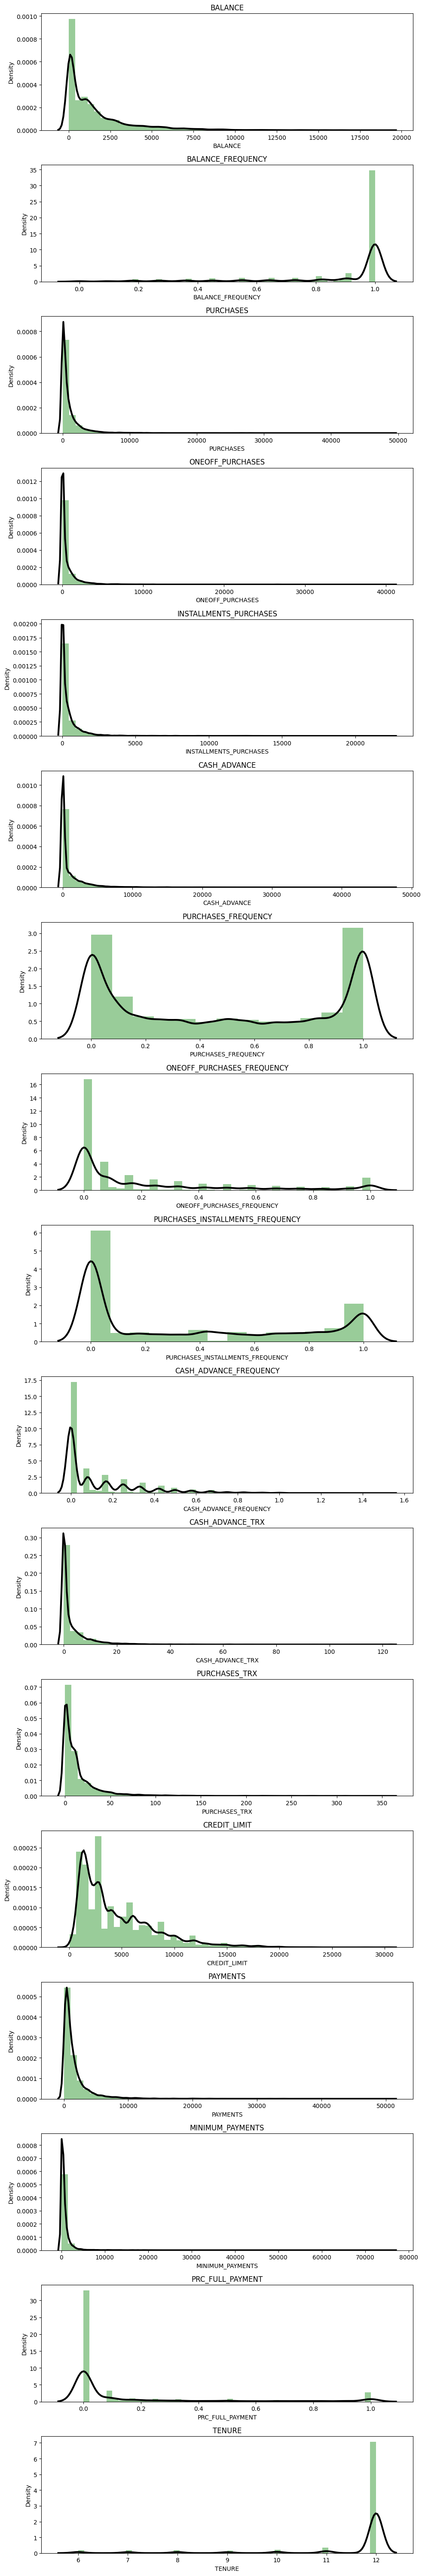

In [148]:
# Visualization using histogram
plt.figure(figsize=(10, 60))
for i in range(0, 17):
    plt.subplot(17, 1, i + 1)
    sns.distplot(df[df.columns[i]], kde_kws={'color': 'black', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'g'})
    plt.title(df.columns[i])
plt.tight_layout()

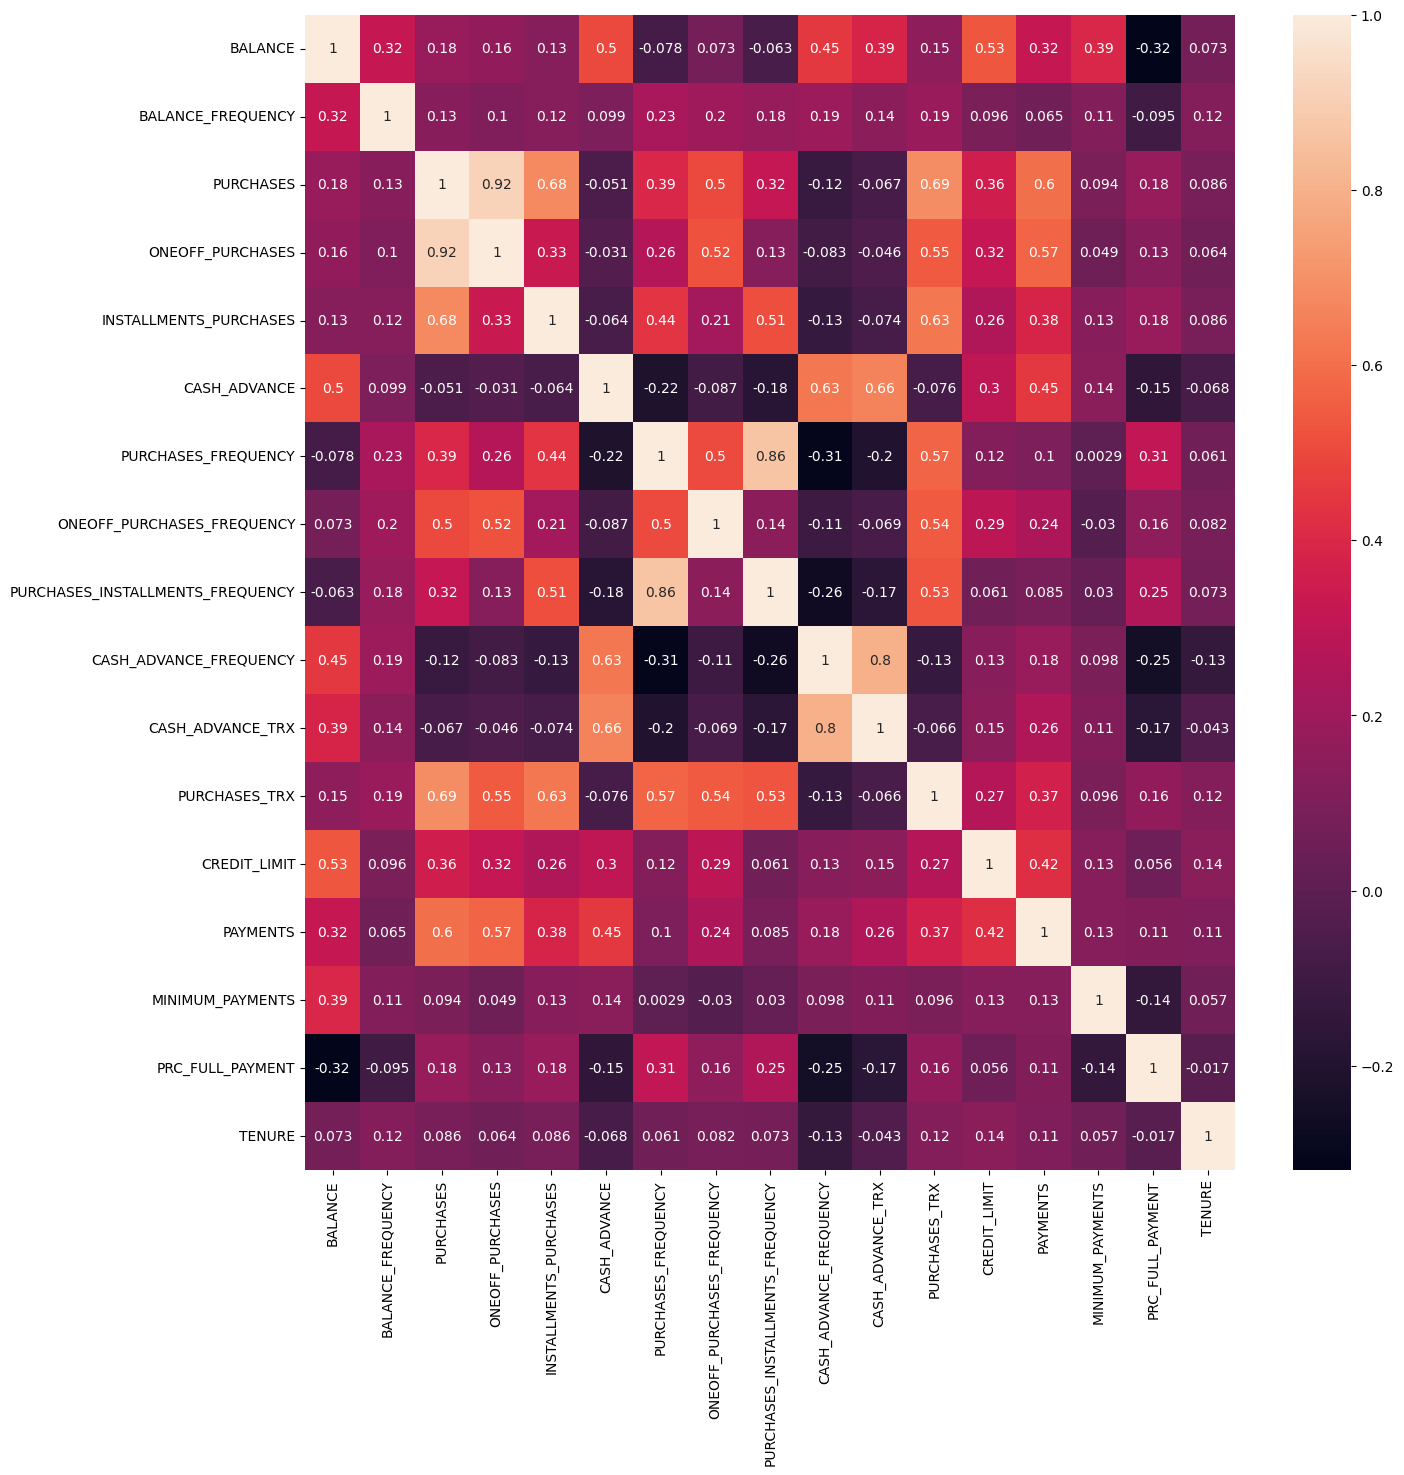

In [149]:
# Heatmap visualization
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [150]:
# Import additional libraries for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [151]:
# Scale the DataFrame
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [152]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
pca_df

,PCA1,PCA2
0,-1.680794,-1.074900
1,-1.137588,2.508632
2,0.968874,-0.383357
3,-0.875633,0.040184
4,-1.605233,-0.686468
...,...,...
8945,-0.362741,-2.013272
8946,-0.567178,-1.636406
8947,-0.928670,-1.810968
8948,-2.338989,-0.651432


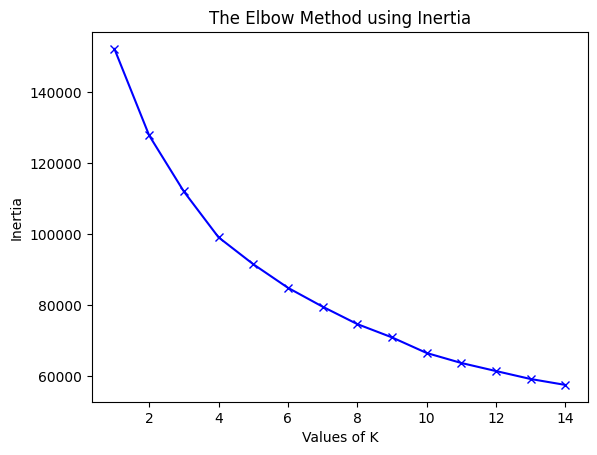

In [153]:
# Finding the optimal 'k' value using the Elbow Method
inertia = []
range_val = range(1, 15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [154]:
# Model Building using Kmeans
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)


In [155]:
# Define cluster labels
cluster_labels = {
    0: 'Low Spenders',
    1: 'High Spenders',
    2: 'Cash Advance Users',
    3: 'Regular Users'
}

In [156]:
# Add cluster labels to the DataFrame
pca_df_kmeans['cluster_label'] = pca_df_kmeans['cluster'].map(cluster_labels)

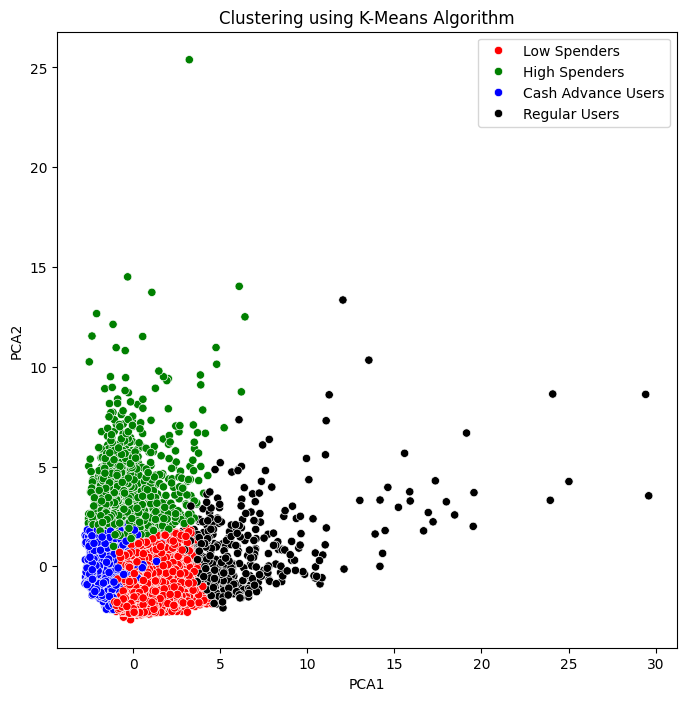

In [157]:
# Visualize the clustered DataFrame with labels
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=['red', 'green', 'blue', 'black'], legend='full')
handles, labels = ax.get_legend_handles_labels()
new_labels = [cluster_labels[int(label)] for label in labels]
ax.legend(handles=handles, labels=new_labels)
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [158]:
# Find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=df.columns)
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df.columns)
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,895.078318,0.935204,1236.601646,594.245379,642.630645,212.366478,0.885670,0.297204,0.712383,0.042508,0.791679,22.100743,4212.977787,1333.768544,650.390862,0.269242,11.595245
1,4601.695217,0.968581,501.126653,320.159908,181.051611,4515.165943,0.286795,0.138489,0.184958,0.485175,14.295492,7.644407,7543.618151,3473.184649,2008.025372,0.034708,11.383973
2,1011.779402,0.789887,270.333426,209.882544,60.717770,595.720465,0.170143,0.085872,0.080882,0.114289,2.120161,2.910508,3279.373500,975.750870,586.212127,0.077921,11.446958
3,3551.153594,0.986968,7681.620098,5095.878826,2587.208264,653.638998,0.946577,0.739169,0.788264,0.071051,2.085575,89.359413,9696.943765,7288.739340,1976.814963,0.286528,11.951100


In [159]:
# Create a target column "Cluster" and "Cluster_Labe;" for storing the cluster segment
cluster_df = pd.concat([df, pd.DataFrame({'Cluster': kmeans_model.labels_})], axis=1)
cluster_df['Cluster_Label'] = cluster_df['Cluster'].map(cluster_labels)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Cluster_Label
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.510000,0.00,12,2,Cash Advance Users
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.340000,0.22,12,1,High Spenders
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.280000,0.00,12,0,Low Spenders
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,864.206571,0.00,12,2,Cash Advance Users
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.790000,0.00,12,2,Cash Advance Users
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.49,1.00,291.12,0.00,291.12,0.00,1.00,0.00,0.83,0.00,0,6,1000.0,325.59,48.890000,0.50,6,0,Low Spenders
8946,19.18,1.00,300.00,0.00,300.00,0.00,1.00,0.00,0.83,0.00,0,6,1000.0,275.86,864.206571,0.00,6,0,Low Spenders
8947,23.40,0.83,144.40,0.00,144.40,0.00,0.83,0.00,0.67,0.00,0,5,1000.0,81.27,82.420000,0.25,6,0,Low Spenders
8948,13.46,0.83,0.00,0.00,0.00,36.56,0.00,0.00,0.00,0.17,2,0,500.0,52.55,55.760000,0.25,6,2,Cash Advance Users


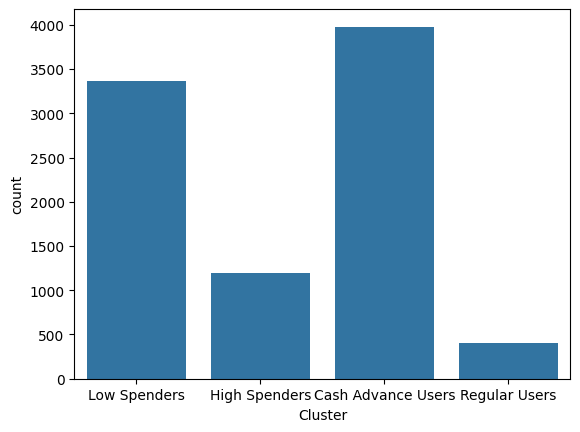

In [160]:
# Visualize Bar Chart for the total of each cluster
sns.countplot(x='Cluster', data=cluster_df)
plt.xticks(ticks=[0, 1, 2, 3], labels=[cluster_labels[0], cluster_labels[1], cluster_labels[2], cluster_labels[3]])
plt.show()

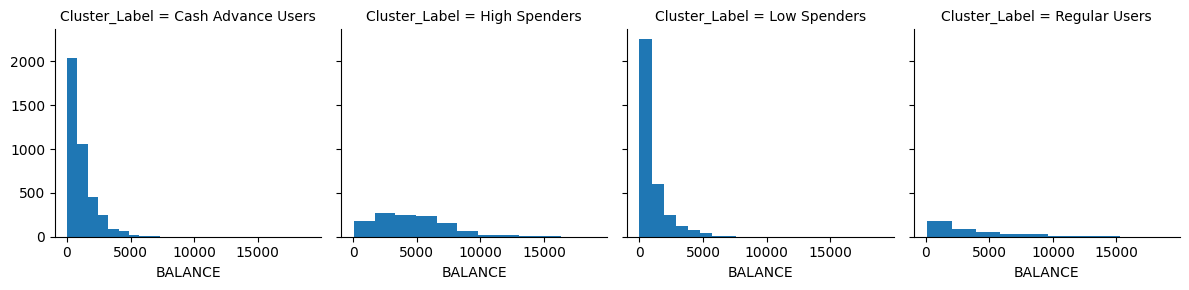

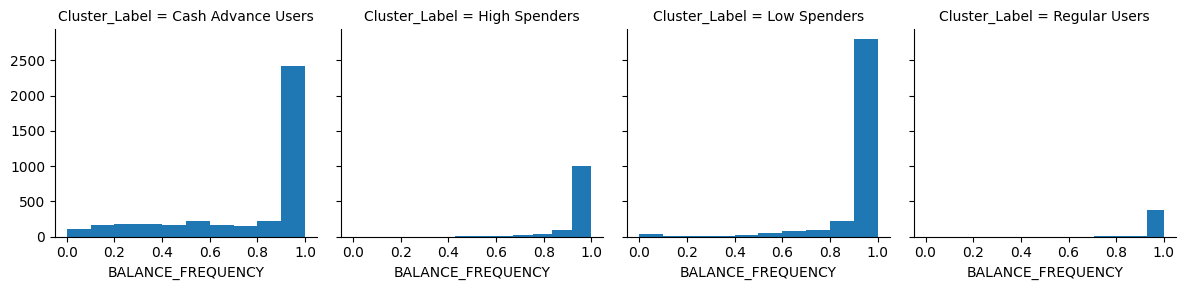

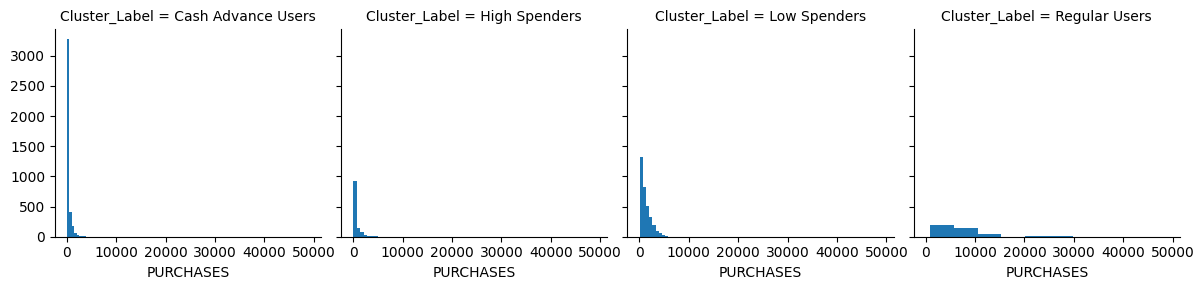

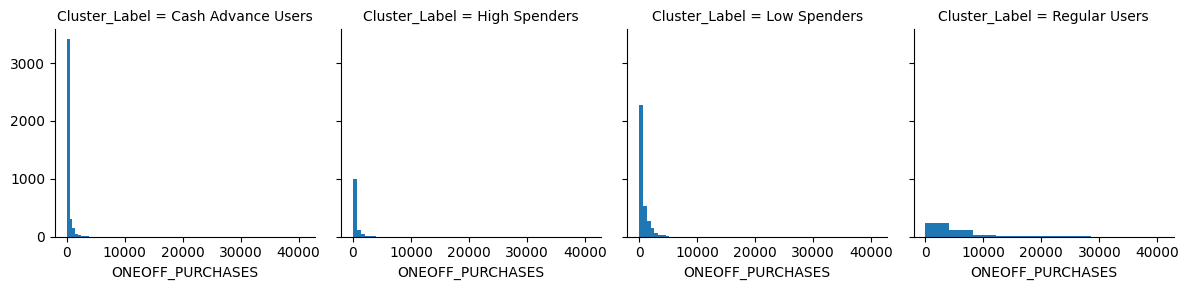

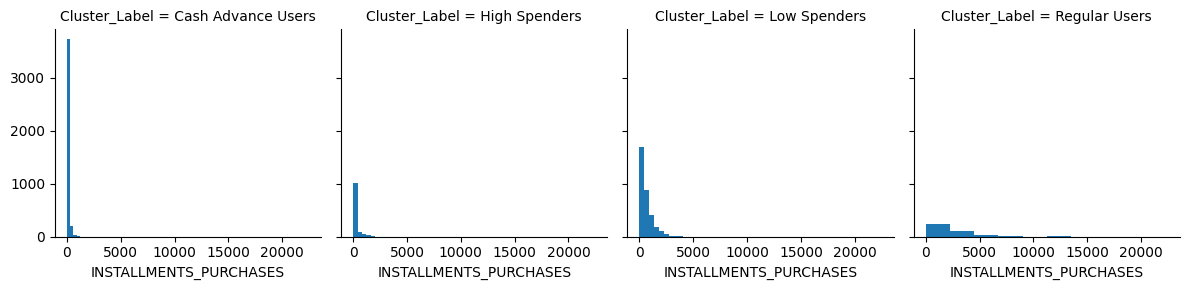

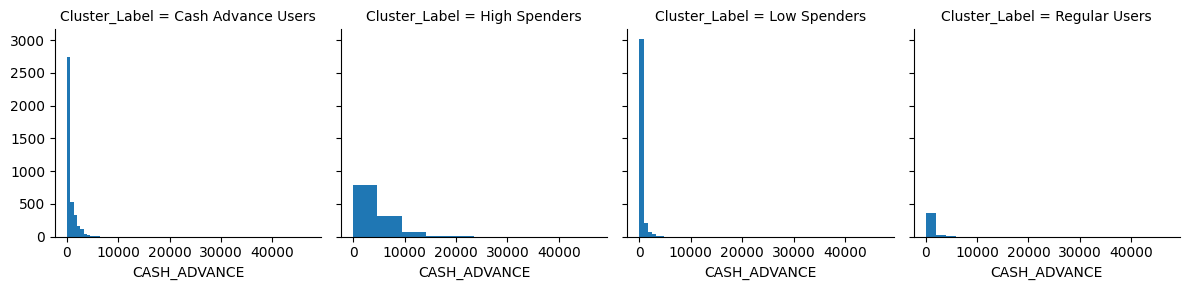

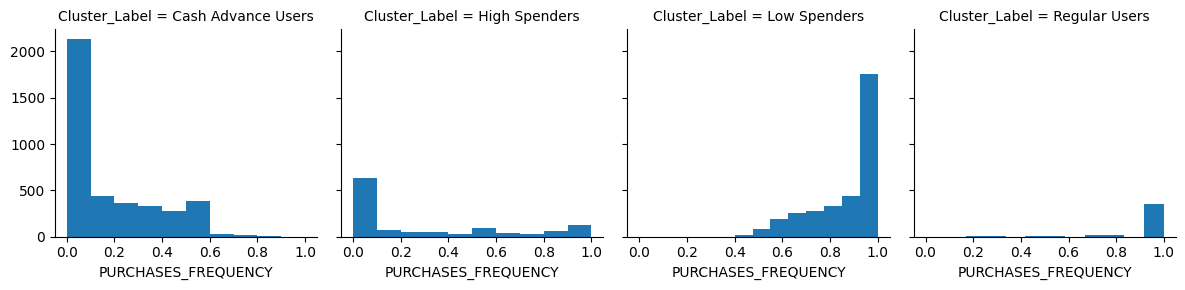

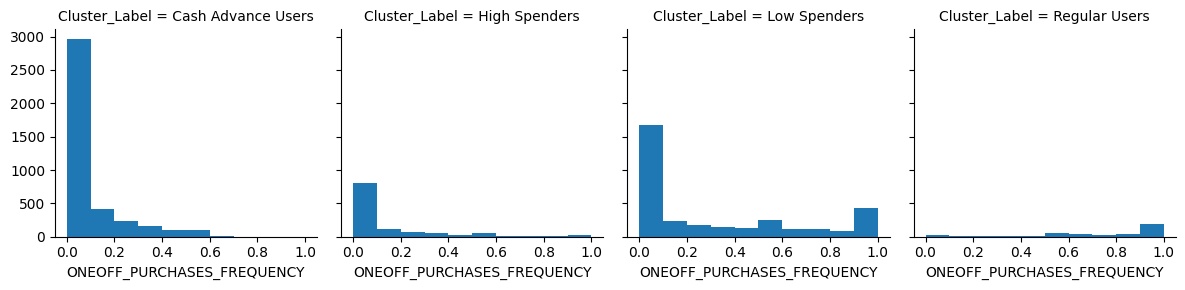

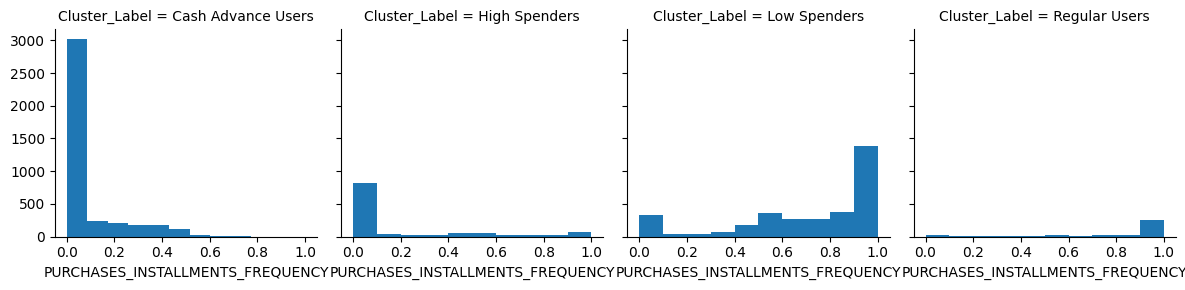

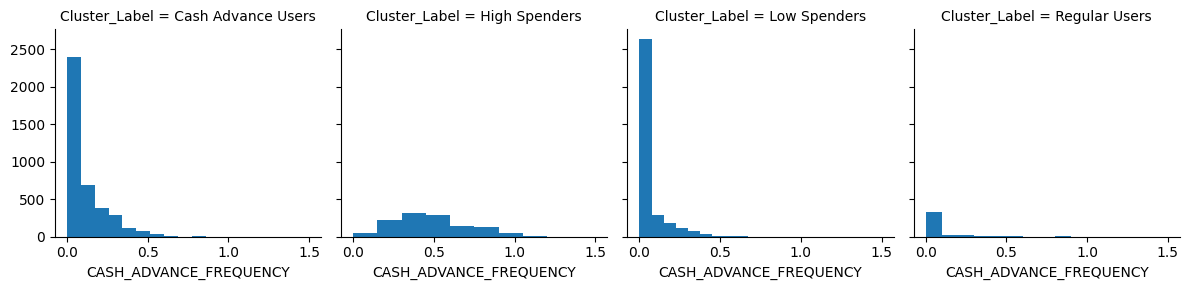

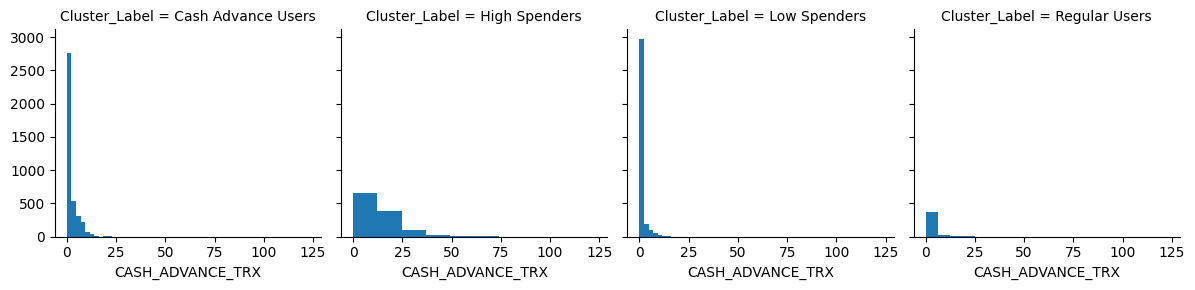

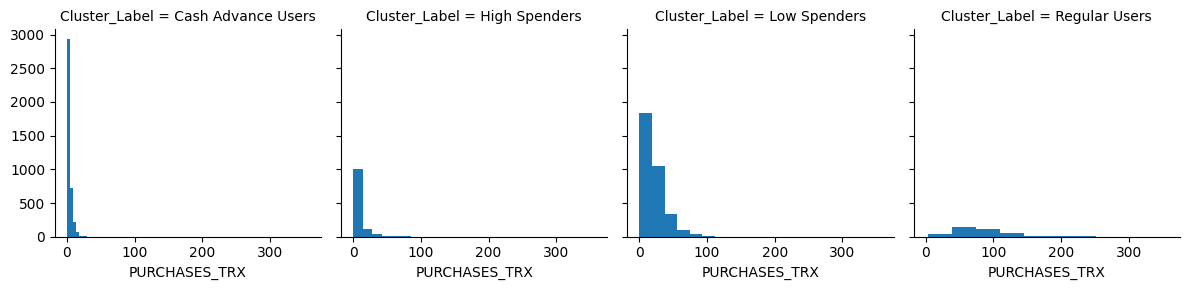

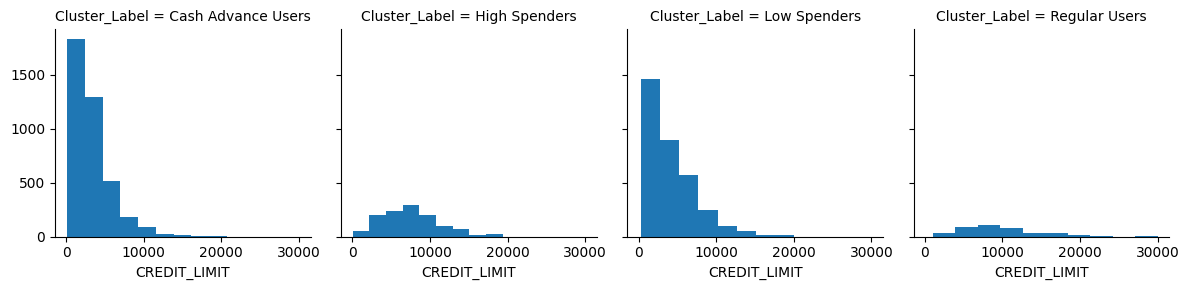

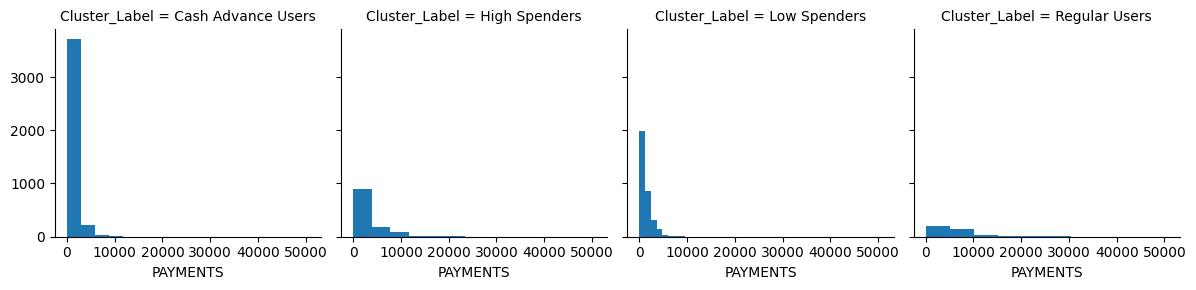

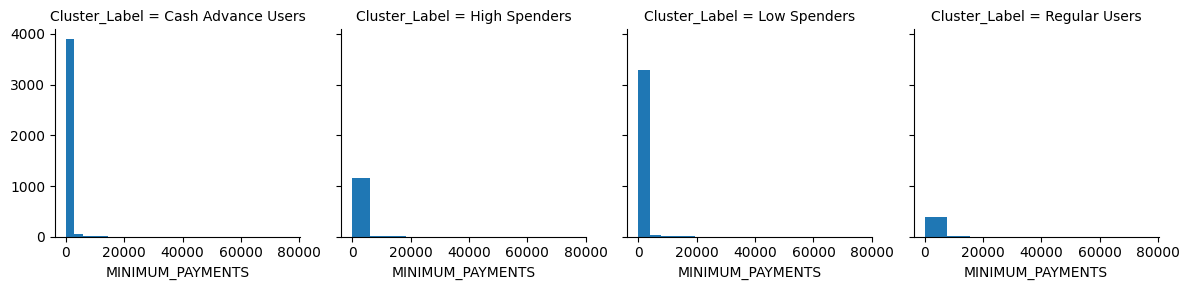

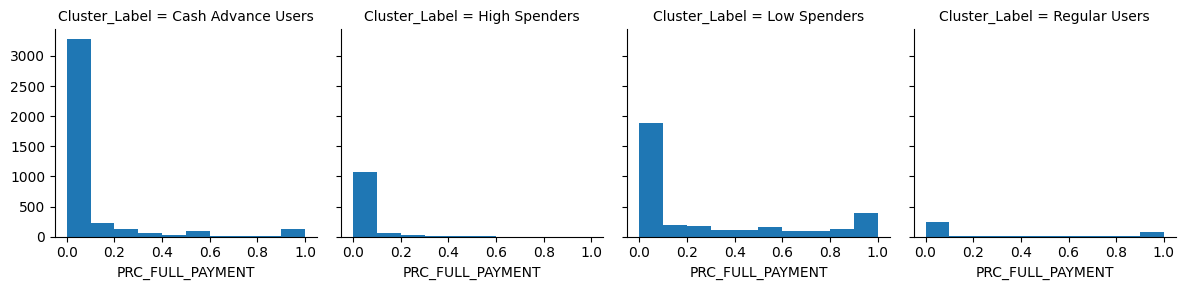

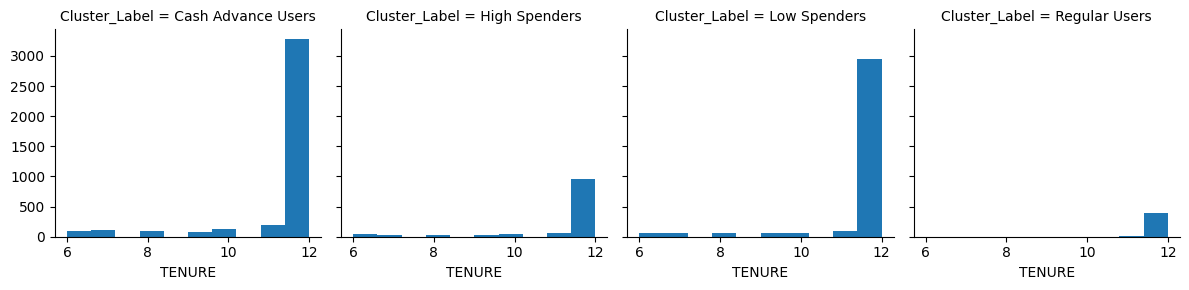

In [161]:
# Visualization Histogram cluster for each column
for c in cluster_df.drop(['Cluster', 'Cluster_Label'], axis=1):
    grid = sns.FacetGrid(cluster_df, col='Cluster_Label')
    grid = grid.map(plt.hist, c)
    plt.show()

In [162]:
# Saving the kmeans clustering model and the data with cluster label
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [163]:
# Training and Testing the model accuracy using decision tree
# Split Dataset
X = cluster_df.drop(['Cluster', 'Cluster_Label'], axis=1)
y = cluster_df[['Cluster']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


In [164]:
# Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [165]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 969   18   27    9]
 [  12  330   35    0]
 [  30   26 1107    1]
 [  12    2    2  105]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1023
           1       0.88      0.88      0.88       377
           2       0.95      0.95      0.95      1164
           3       0.91      0.87      0.89       121

    accuracy                           0.94      2685
   macro avg       0.92      0.91      0.92      2685
weighted avg       0.94      0.94      0.94      2685



In [166]:
# Predict a segmentation for a new customer based on user's input:
print("\n---- Classification new customer ----")


---- Classification new customer ----


In [167]:
# Example input values for a new customer
new_customer_data = {
    "BALANCE": float(input("Enter BALANCE: ")),
    "BALANCE_FREQUENCY": float(input("Enter BALANCE_FREQUENCY: ")),
    "PURCHASES": float(input("Enter PURCHASES: ")),
    "ONEOFF_PURCHASES": float(input("Enter ONEOFF_PURCHASES: ")),
    "INSTALLMENTS_PURCHASES": float(input("Enter INSTALLMENTS_PURCHASES: ")),
    "CASH_ADVANCE": float(input("Enter CASH_ADVANCE: ")),
    "PURCHASES_FREQUENCY": float(input("Enter PURCHASES_FREQUENCY: ")),
    "ONEOFF_PURCHASES_FREQUENCY": float(input("Enter ONEOFF_PURCHASES_FREQUENCY: ")),
    "PURCHASES_INSTALLMENTS_FREQUENCY": float(input("Enter PURCHASES_INSTALLMENTS_FREQUENCY: ")),
    "CASH_ADVANCE_FREQUENCY": float(input("Enter CASH_ADVANCE_FREQUENCY: ")),
    "CASH_ADVANCE_TRX": float(input("Enter CASH_ADVANCE_TRX: ")),
    "PURCHASES_TRX": float(input("Enter PURCHASES_TRX: ")),
    "CREDIT_LIMIT": float(input("Enter CREDIT_LIMIT: ")),
    "PAYMENTS": float(input("Enter PAYMENTS: ")),
    "MINIMUM_PAYMENTS": float(input("Enter MINIMUM_PAYMENTS: ")),
    "PRC_FULL_PAYMENT": float(input("Enter PRC_FULL_PAYMENT: ")),
    "TENURE": float(input("Enter TENURE: "))
}

new_customer_df = pd.DataFrame(new_customer_data, index=[0])

In [168]:
# Ensure the order of columns in new_customer_df matches the original df
new_customer_df = new_customer_df[df.columns]

In [169]:
# Scale the new customer data using the same scaler
scaled_new_customer = scalar.transform(new_customer_df)

In [170]:
# Predict the cluster for the new customer data using KMeans model
new_customer_cluster = kmeans_model.predict(scaled_new_customer)
print("The new customer belongs to cluster:", cluster_labels[new_customer_cluster[0]])

The new customer belongs to cluster: Cash Advance Users
